In [15]:
pip install konlpy

In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [18]:
from google.colab import files
files.upload()

Saving 한글.txt to 한글 (1).txt


{'한글.txt': b"1. \xea\xb0\x9c\xec\x9a\x94[\xed\x8e\xb8\xec\xa7\x91]\r\n\xed\x95\x9c\xea\xb8\x80 \xeb\x98\x90\xeb\x8a\x94 \xec\xa1\xb0\xec\x84\xa0\xea\xb8\x80(\xeb\xac\xb8\xed\x99\x94\xec\x96\xb4 \xed\x91\x9c\xea\xb8\xb0)\xec\x9d\x80 \xed\x98\x84\xeb\x8c\x80 \xed\x95\x9c\xea\xb5\xad\xec\x96\xb4 \xeb\x98\x90\xeb\x8a\x94 \xed\x95\x9c\xea\xb5\xad\xec\x96\xb4\xec\xa1\xb1 \xec\x96\xb8\xec\x96\xb4[9]\xec\x9d\x98 \xed\x91\x9c\xea\xb8\xb0\xec\x97\x90 \xec\x93\xb0\xec\x9d\xb4\xeb\x8a\x94 \xeb\xac\xb8\xec\x9e\x90\xeb\xa1\x9c, \xeb\x82\xa8\xed\x95\x9c\xea\xb3\xbc \xeb\xb6\x81\xed\x95\x9c, \xec\x97\xb0\xeb\xb3\x80 \xec\xa7\x80\xec\x97\xad\xec\x97\x90\xec\x84\x9c \xec\x82\xac\xec\x9a\xa9\xeb\x90\x98\xeb\x8a\x94 \xea\xb3\xb5\xec\x9a\xa9 \xeb\xac\xb8\xec\x9e\x90\xec\x9d\xb4\xeb\x8b\xa4. \xed\x98\x84\xeb\x8c\x80 \xea\xb8\xb0\xec\xa4\x80 \xea\xb8\xb0\xeb\xb3\xb8\xec\x9e\x90\xec\x9d\x8c 14\xec\x9e\x90\xec\x99\x80 \xea\xb8\xb0\xeb\xb3\xb8\xeb\xaa\xa8\xec\x9d\x8c 10\xec\x9e\x90\xeb\xa1\x9c \xea\xb5\xac\xec\

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

In [20]:
f = open('한글.txt', 'r', encoding = 'UTF8')
text = f.read()

maskHeart = np.array(Image.open('heart_mask.jpg'))

In [21]:
from konlpy.tag      import Okt

# Twitter 형태소 분석을 위한 객체 생성
t = Okt()

# 문자열에서 명사만 추출하기
명사 = t.nouns(text)

#워드클라우드에서 사용한 명사들을 문자열로 변환하기
#간단한 프로그램 필요
strData = ''

for t in 명사:
  strData = strData + t + ' '

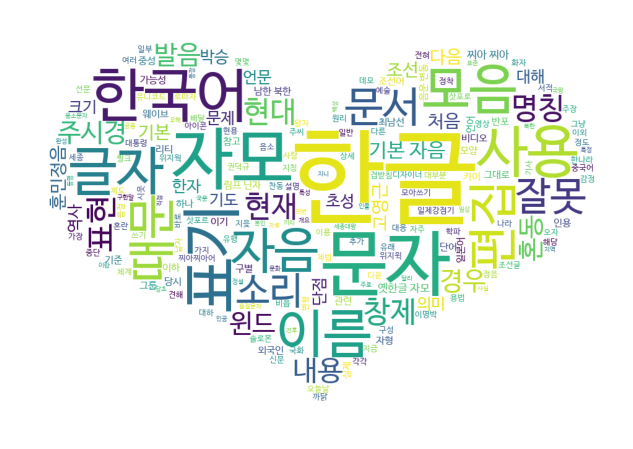

In [22]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#불용어로 처리한 단어들 추가하기
s_words = STOPWORDS.union({'또한', '모두', '이후'})

#워드 클라우드 생성하기
wordcloud = WordCloud(width=1500, height=1000,
                      font_path=path,
                      mask=maskHeart,
                      stopwords=s_words,
                      background_color='White').generate(strData)





#이미지 크기 설정
plt.figure(figsize=(12,8))

#워드클라우드 이미지 생성
plt.imshow(wordcloud)

#x, y축 눈금 숨기기
plt.axis('off')

plt.show()